# Importing Praw

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/NegotiationPast5409"
reddit = praw.Reddit(
    client_id="lvnzs8-qJr-J5-4GcRq1Yg",
    client_secret="L5xMpuZ4WHh4CIh3Vs2grKs1hMgL1g",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

C:\Users\tejap\AppData\Local\Temp\ipykernel_14176\3422756113.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# pick a topic

In [3]:
# Picking out a trending topic 
headlines = set()
for submission in reddit.subreddit("America").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

For genuine questions, you should be using /r/AskanAmerican
gjwmfb
lannisterstark
1589495293.0
45
0.98
https://www.reddit.com/r/america/comments/gjwmfb/for_genuine_questions_you_should_be_using/
0


In [4]:
headlines = set()
for submission in reddit.subreddit("America").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

637


# Creating a data frame

In [5]:
# Step 4: Create a DataFrame
df = pd.DataFrame(headlines, columns=['Titles'])

In [6]:
df

,Titles
0,The face of liberals/progressive
1,Best places to see in the USA.
2,How is life in the U.S like?
3,How do college students see +21yo people?
4,Did you know Canada had a one thousand dollar ...
...,...
632,"The worst towns to live in( Not in order, plus..."
633,American Dream is it dead or still alive?
634,Banned From Britain For Some Reason.... Never ...
635,"For 48 Years, Robert “Raven” Kraft Ran the Sam..."


In [7]:
df.columns

Index(['Titles'], dtype='object')

# Create a function

In [8]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)

#Show the clean text

df.head()

,Titles
0,The face of liberals/progressive
1,Best places to see in the USA.
2,How is life in the U.S like?
3,How do college students see +21yo people?
4,Did you know Canada had a one thousand dollar ...


In [9]:
# Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,The face of liberals/progressive
1,Best places to see in the USA.
2,How is life in the U.S like?
3,How do college students see +21yo people?
4,Did you know Canada had a one thousand dollar ...


In [10]:
df.describe()

,Titles
count,637
unique,636
top,
freq,2


In [11]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,The face of liberals/progressive,0.0,0.0
1,Best places to see in the USA.,0.3,1.0
2,How is life in the U.S like?,0.0,0.0
3,How do college students see +21yo people?,0.0,0.0
4,Did you know Canada had a one thousand dollar ...,0.0,0.0


In [13]:
# Categorize sentiments
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df['Insight'] = df['Polarity'].apply(getInsight)

In [14]:
df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,The face of liberals/progressive,0.000000,0.000000,Neutral
1,Best places to see in the USA.,0.300000,1.000000,Positive
2,How is life in the U.S like?,0.000000,0.000000,Neutral
3,How do college students see +21yo people?,0.000000,0.000000,Neutral
4,Did you know Canada had a one thousand dollar ...,0.000000,0.000000,Neutral
5,Article deep-diving into the geopolitical deve...,0.000000,0.000000,Neutral
6,Mexican Woman Accused of at Least Five Homicid...,0.200000,-0.150000,Negative
7,Writing cursive,0.000000,0.000000,Neutral
8,Are the ‘Checks and Balances’ practices equally?,0.250000,0.000000,Neutral
9,We need to talk about America’s mental health ...,0.350000,-0.050000,Negative


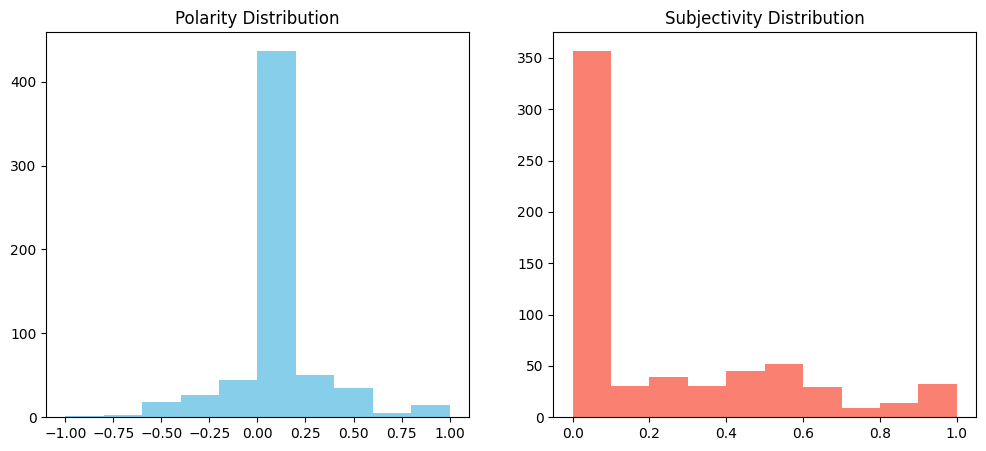

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

# Create histograms for Polarity and Subjectivity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Polarity'], bins=10, color='skyblue')
plt.title('Polarity Distribution')
plt.subplot(1, 2, 2)
plt.hist(df['Subjectivity'], bins=10, color='salmon')
plt.title('Subjectivity Distribution')
plt.show()




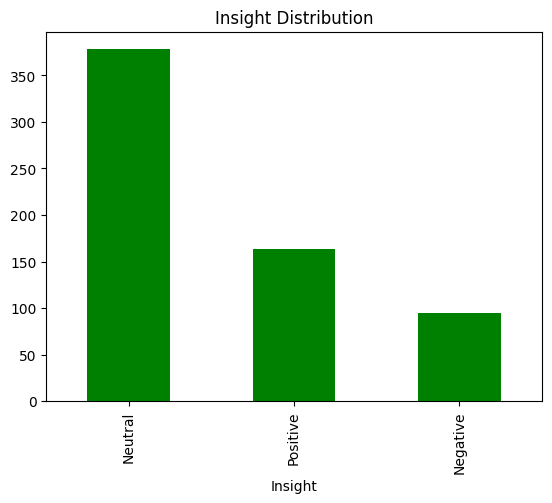

In [16]:
# Create a bar chart for Insight distribution
df['Insight'].value_counts().plot(kind='bar', color='green')
plt.title('Insight Distribution')
plt.show()

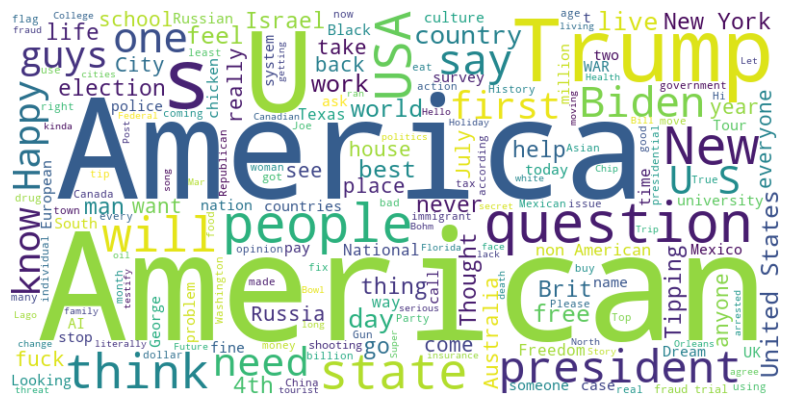

In [17]:
# Generate a word cloud
text = ' '.join(df['Titles'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
